# Simple tf.keras Sequential Model

## Notebook Imports

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt

from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Genarate a data

* An experienmental drug tested on individuals from ages 13 to 100 in a clinical trial.
* The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
* Around 95% of patients 65 or older experienced side effects.
* Around 95% of patients under 65 experienced no side effects.

In [3]:
train_labels = []
train_samples = []

test_labels = []
test_samples = []

In [4]:
for i in range(50):
    # The ~5% younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
for i in range(10):
    # The ~5% younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [6]:
# for i in train_samples:
#     print(i)

In [7]:
# for i in train_labels:
#     print(i)

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [9]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [11]:
# for i in scaled_train_samples:
#     print(i)

## Simple tf.keras Sequential Model

In [12]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available 1


In [13]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 3s - loss: 0.6767 - accuracy: 0.5402 - val_loss: 0.6645 - val_accuracy: 0.6190 - 3s/epoch - 15ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6568 - accuracy: 0.6429 - val_loss: 0.6347 - val_accuracy: 0.7524 - 445ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6288 - accuracy: 0.7534 - val_loss: 0.6028 - val_accuracy: 0.8333 - 463ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6006 - accuracy: 0.7841 - val_loss: 0.5698 - val_accuracy: 0.8524 - 478ms/epoch - 3ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5711 - accuracy: 0.8037 - val_loss: 0.5353 - val_accuracy: 0.8667 - 469ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5407 - accuracy: 0.8222 - val_loss: 0.5007 - val_accuracy: 0.8714 - 458ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5106 - accuracy: 0.8349 - val_loss: 0.4665 - val_accuracy: 0.8857 - 464ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4809 - accuracy: 0.8556 - val_loss: 0.4335 - val_accuracy: 0.8905 - 457ms/epoch - 2ms/step
Ep

## Predict

In [17]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [18]:
# for i in predictions:
#     print(i)

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [20]:
# for i in rounded_predictions:
#     print(i)

## Confusion Matrix

In [21]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
labels = ['no_side_effects', 'had_side_effects']

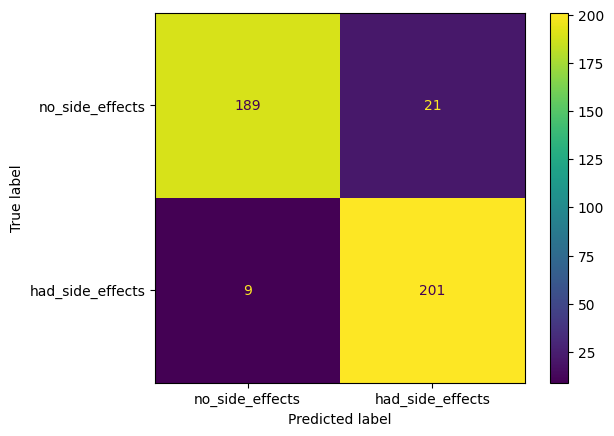

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()